In [69]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"C:\Users\dell\Downloads\stock_train.csv")
print(df)


            Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800
...          ...     ...     ...     ...     ...         ...
1253  12/23/2016  790.90  792.74  787.28  789.91     623,400
1254  12/27/2016  790.68  797.86  787.66  791.55     789,100
1255  12/28/2016  793.70  794.23  783.20  785.05   1,153,800
1256  12/29/2016  783.33  785.93  778.92  782.79     744,300
1257  12/30/2016  782.75  782.78  770.41  771.82   1,770,000

[1258 rows x 6 columns]


In [70]:
x=df['Open']


In [71]:
#here we have conerted 1d into 2d
x=np.array(x).reshape(len(x),1)
#min max scaller...scalling allways req 2d data
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
x=scaler.fit_transform(x)
x

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [72]:
x_stock=[]
y_stock=[]        #we spliteddata so that we can use timestamp 
for i in range(30,len(x)):
    x_stock.append(x[i-30:i])   #here we dont req iloc as we have coverted dfin array
    y_stock.append(x[i])

In [73]:
import numpy as np
x_stock=np.array(x_stock)
y_stock=np.array(y_stock)
print(x_stock)
print(y_stock)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.0440695 ]
  [0.04648783]
  [0.04745517]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.04648783]
  [0.04745517]
  [0.04873875]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.04745517]
  [0.04873875]
  [0.03936305]]

 ...

 [[0.88637547]
  [0.87032145]
  [0.88563137]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.87032145]
  [0.88563137]
  [0.90743359]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.88563137]
  [0.90743359]
  [0.91571173]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]
[[0.04873875]
 [0.03936305]
 [0.04137213]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [74]:
#chking shape of lstm...it rep 
print(x_stock.shape)

(1228, 30, 1)


In [75]:
#training ka process 
import tensorflow as tf
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.models import Sequential
lstm=Sequential()

lstm.add(LSTM(units=50,input_shape=(x_stock.shape[1],x_stock.shape[2]),return_sequences=True))    #1st layer extract input data from 1st layer 
lstm.add(LSTM(units=20)) #2nd lstm layes takes output from 1st layer and learn more complex pattern


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [76]:
#output layer 
lstm.add(Dense(units=1,activation='relu'))  #data reg ka h isslea relu....output 0 to 1m chaea hota toh sigmoid

In [77]:
lstm.compile(optimizer='adam',loss='mean_squared_error')

In [78]:
#fitting.....data kotrainkrw waya
lstm.fit(x_stock,y_stock,batch_size=10,epochs=50)

Epoch 1/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - loss: 0.0369
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0014
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0011
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0013
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0016
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0011
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 9.8859e-04
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 9.5051e-04
Epoch 9/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.0011
Epoch 10/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 8.5499e-04
Epoch 11/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 7.8924e-04
Epoch 12/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 9.2216e-04
Epoch 13/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 8.1643e-04
Epoch 14/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 8.6755e-04
Epoch 15/50
12

In [79]:
#from tensorflow.keras.callbacks import ModelCheckpoint
#model=ModelCheckpoint('best_ann(2).keras',save_best_only=True)
history=lstm.fit(x_stock,y_stock,batch_size=10,epochs=50,validation_data=(x_stock,y_stock))
Training_loss=history.history['loss']
val_loss=history.history['val_loss']


Epoch 1/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 3.2540e-04 - val_loss: 3.5095e-04
Epoch 2/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 2.7582e-04 - val_loss: 3.3363e-04
Epoch 3/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 4.2118e-04 - val_loss: 2.5411e-04
Epoch 4/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 2.7817e-04 - val_loss: 2.7585e-04
Epoch 5/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 3.2689e-04 - val_loss: 2.5462e-04
Epoch 6/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 3.0121e-04 - val_loss: 2.6146e-04
Epoch 7/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 2.5137e-04 - val_loss: 2.6548e-04
Epoch 8/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 3.9658e-04 - val_loss: 2.5684e-04
Epoch 9/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 2.6449e-04 - val_loss: 2.5272e-04
Epoch 10/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 3.0381e-04 - val_loss: 2.5685e-04
Epoch 11/50
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/

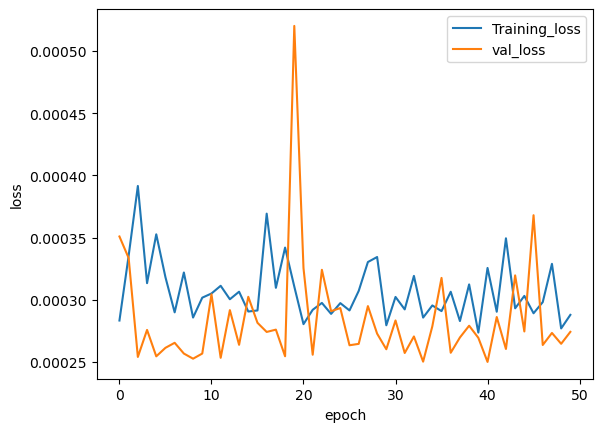

In [80]:
#ploting learning curve
import matplotlib.pyplot as plt
plt.plot(Training_loss)
plt.plot(val_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Training_loss','val_loss'])
plt.show()

In [81]:
y_pred=lstm.predict(x_stock)
y_pred

39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step


array([[0.04915363],
       [0.05028808],
       [0.04481739],
       ...,
       [0.9576133 ],
       [0.9629856 ],
       [0.9442584 ]], dtype=float32)

In [82]:
#scalled data ko org formm lana as its b4 transformation 

y_pred=scaler.inverse_transform(y_pred)
y_pred

array([[305.54303],
       [306.15286],
       [303.21204],
       ...,
       [793.8946 ],
       [796.78253],
       [786.7156 ]], dtype=float32)

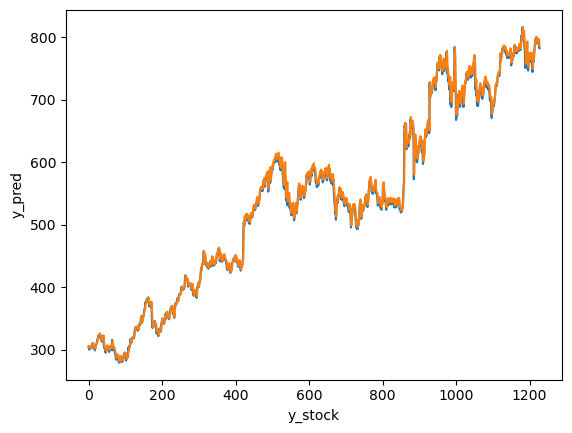

In [100]:
y_stock=scaler.inverse_transform(y_stock)
import matplotlib.pyplot as plt
plt.plot(y_stock)
plt.plot(y_pred)
plt.xlabel('y_stock')
plt.ylabel('y_pred')
plt.show()

In [102]:
y_stock

array([[305.32],
       [300.28],
       [301.36],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [104]:
y_pred

array([[305.54303],
       [306.15286],
       [303.21204],
       ...,
       [793.8946 ],
       [796.78253],
       [786.7156 ]], dtype=float32)

In [108]:
#aab hme prediction krwani h 31st dec2016
last_30_days=x[-30:]
print(last_30_days.shape)

#yeh data 2d lstm m 3d work krta h 

(30, 1)


In [112]:
last_30_days=np.reshape(last_30_days,(1,30,1))
dec_31=lstm.predict(last_30_days)
dec_31=scaler.inverse_transform(dec_31)
dec_31


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[786.76996]], dtype=float32)

In [116]:
# #predict next 10days including previous data
# x_stock=[]
# y_stock=[]
# for i in range(30,len(x)):
#     x_stock.append(x[i-30:i])   #here we dont req iloc as we have coverted dfin array
#     y_stock.append(x[i])


# next_10_days=x[-30:]
# print(next_10_days.shape)

# next_10_days=np.reshape(last_30_days,(1,30,1))

# next_10_days=lstm.predict(last_30_days)
# next_10_days=scaler.inverse_transform(dec_31)
# next_10_days

(30, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


array([[423215.2]], dtype=float32)

In [130]:
predicted=np.array([])
for i in range(10):
    d=x[-30:]
    next_day=lstm.predict(np.reshape(d,(1,30,1)))
    predicted=np.append(predicted,next_day)
    x=np.append(x,next_day)

print(predicted.shape)    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
(10,)


In [132]:
predicted=scaler.inverse_transform(np.reshape(predicted,(10,1)))
predicted

array([[808.34432265],
       [809.75191902],
       [811.13103088],
       [812.48005617],
       [813.79671998],
       [815.07884351],
       [816.32485675],
       [817.53344602],
       [818.70403457],
       [819.83643017]])

In [155]:
df_1=pd.read_csv(r"C:\Users\dell\Downloads\stock_test.csv")['Open']
df

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


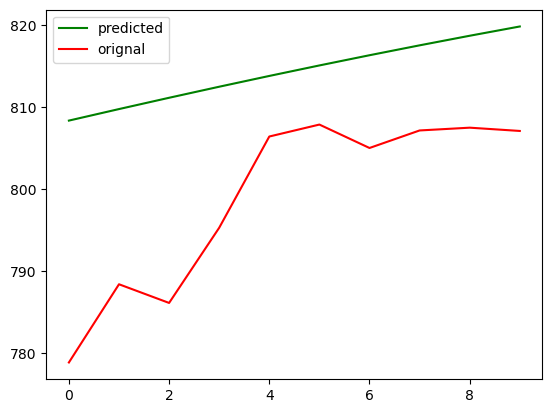

In [157]:
df_1=df_1.iloc[:10]
plt.plot(predicted,color='green')
plt.plot(df_1,color='red')
plt.legend(['predicted','orignal'])
plt.show()